## Name:
### CSCI E-89C Deep Reinforcement Learning  
### Part II of Assignment 11

# Preface
We first consider images of 10 types (handwritten digits from "0" to "9") and build a feedforward fully connected Deep Neural Network for classification of the images (the accuracy, in fact, can further be increased by adding convolutional layers).  

Let's load libraries:

In [3]:
from keras.datasets import mnist
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import time
import pickle

from keras import layers
from keras import models
from keras.layers import Dropout
from keras.layers import LeakyReLU

Next, we load the images:

In [3]:
with open('handwritten_digits.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

Here, 'X_train' and 'X_test' are the sets of 28x28 images; and 'y_train' and 'y_test' are the corresponding correct labels. For example, let's look at the first 18 images in 'X_train' dataset:

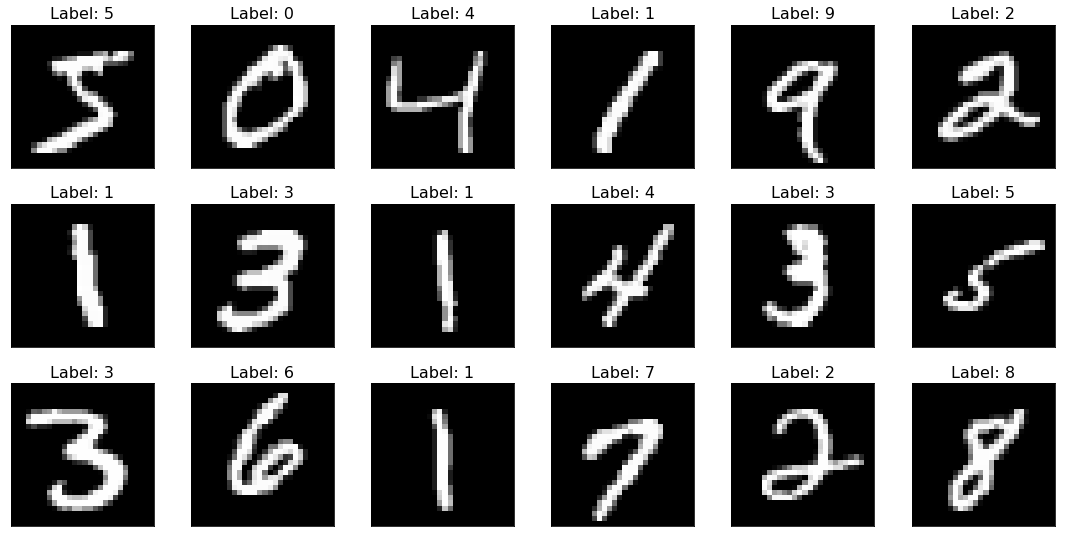

In [4]:
fig = plt.figure(figsize=(15,8))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Label: {}".format(y_train[i]),fontsize=16)
    plt.xticks([])
    plt.yticks([])
plt.show()

Let's reshape the images (we would not need to reshape in case of Convolutional Neural Network) which will be inputs to the Neural Network: 

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Let's also rescale the inputs:

In [6]:
X_train /= 255
X_test /= 255

Because we want to classify, let's create dummies for the output:

In [7]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [8]:
y_train.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0


Let's now build a Neural Network and train it:

In [9]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))                          
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
nepochs = 35
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train,
          batch_size=128, epochs=nepochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [==============================] - 13s 216us/step - loss: 0.2510 - accuracy: 0.9256 - val_loss: 0.0988 - val_accuracy: 0.9691
Epoch 2/35
60000/60000 [==============================] - 13s 210us/step - loss: 0.1004 - accuracy: 0.9692 - val_loss: 0.0765 - val_accuracy: 0.9762
Epoch 3/35
60000/60000 [==============================] - 13s 223us/step - loss: 0.0723 - accuracy: 0.9773 - val_loss: 0.0775 - val_accuracy: 0.9768
Epoch 4/35
60000/60000 [==============================] - 13s 211us/step - loss: 0.0579 - accuracy: 0.9813 - val_loss: 0.0745 - val_accuracy: 0.9774
Epoch 5/35
60000/60000 [==============================] - 13s 221us/step - loss: 0.0451 - accuracy: 0.9852 - val_loss: 0.0603 - val_accuracy: 0.9822
Epoch 6/35
60000/60000 [==============================] - 13s 224us/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0632 - val_accuracy: 0.9818
Epoch 7/35
60000/60000 [==============================] 

<Figure size 432x288 with 0 Axes>

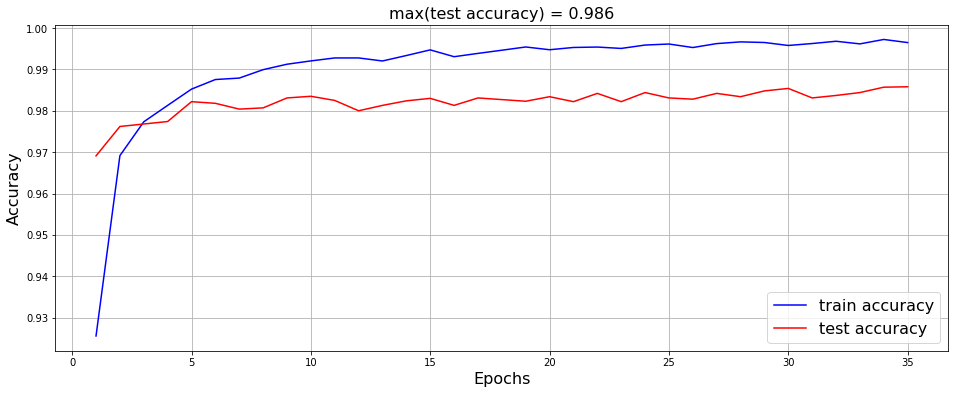

In [11]:
plt.clf()
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(16,6))
plt.plot(range(1,nepochs+1), train_acc, 'b', label='train accuracy',color="blue")
plt.plot(range(1,nepochs+1), test_acc, 'b', label='test accuracy',color="red")

plt.title('max(test accuracy) = ' + str(round(max(test_acc),3)),fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.grid(True)
plt.legend(loc = 'lower right',fontsize=16)

plt.show()

Let's now classify the images the Neural Network has not seen:

In [12]:
y_test_hat = model.predict_classes(X_test)

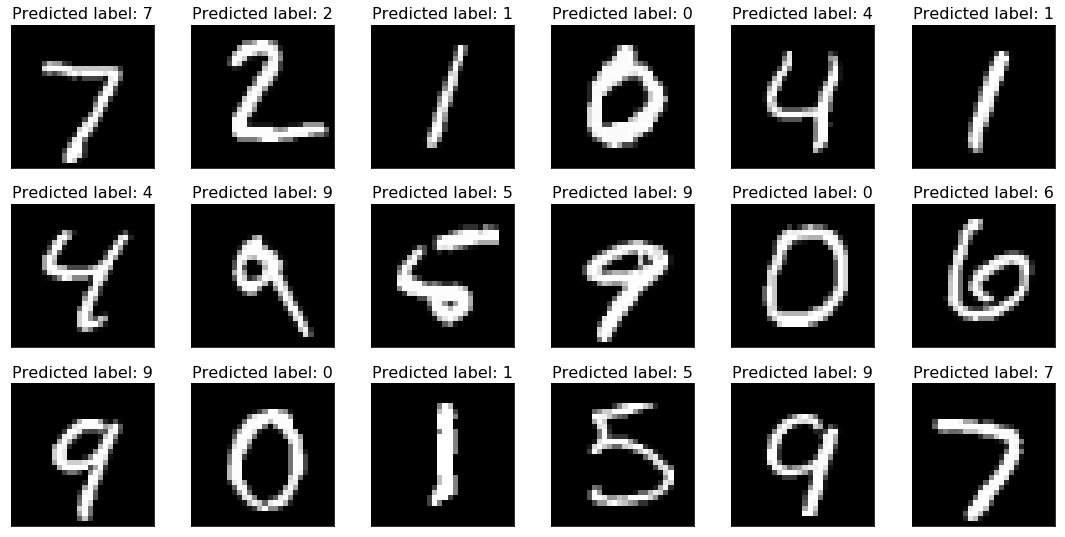

In [13]:
fig = plt.figure(figsize=(15,8))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(X_test.reshape((-1,28,28))[i], cmap='gray', interpolation='none')
    plt.title("Predicted label: {}".format(y_test_hat[i]),fontsize=16)
    plt.xticks([])
    plt.yticks([])
plt.show()

# Problem 1 (20 points)

In this problem we will develop a Q-learning algorithm for selecting the best treatment based on "medical" images. Each 128x128 image is a vector of 784 features: ${\bf x}=(x_1,x_2,\ldots,x_{784})^T$.

Please load the observations of features ${\bf x}(S_t)$, $t=0,1,\ldots$ ('images' variable), actions $A_t$, $t=0,1,\ldots$ ('actions' variable), and rewards $R_t$, $t=1,2,\ldots$ from the 'markov_decision_process.pkl' file. Please notice that in each state $s\in \mathcal{S}$, the set of admissible actions is $\mathcal{A}(s)=\{0,1,2\}$. Here, "0" states for no treatment and "1" and "2" are two treatments of different types. We assume that this is a Markov Decision Process, that is, the joint distribution of the next state $S_{t+1}$ and reward $R_{t+1}$ depens on the pair of current state and action $(S_t, A_t)$ only.

Please develop a Q-learning algorithm with approximation via a Deep Neural Network (NN). Please use the vector of fetures ${\bf x}(S_t)$ as an input to the NN. The output of the NN should be a vector of action-values $(\hat{q}(S_t,0,{\bf w}),\hat{q}\left(S_t,1,{\bf w}),\hat{q}(S_t,2,{\bf w})\right)^T$. Please feel free to use either feedforward fully connected NN or Convolutional NN.

Please 
- train the NN in mini-batches of size 128, that is, the weights ${\bf w}$ will be updated every 128 time steps
- update the target $R_{t+1}+\gamma \max_{ a}\hat{q}(S_{t+1},a,{\bf w})$ every 1280 time steps only, that is, not the most recent weights should be used to evaluate this taget  - this usually guarantees a better stability of the algorithm

Once the training is finished, please pick 18 images at random and display them together with optimal actions in the titles. 

In [4]:
with open('markov_decision_process.pkl', 'rb') as f:
    images, actions, rewards = pickle.load(f)

In [5]:
len(actions)

50000

In [6]:
images.shape

(50000, 28, 28)

In [7]:
len(rewards)

50000

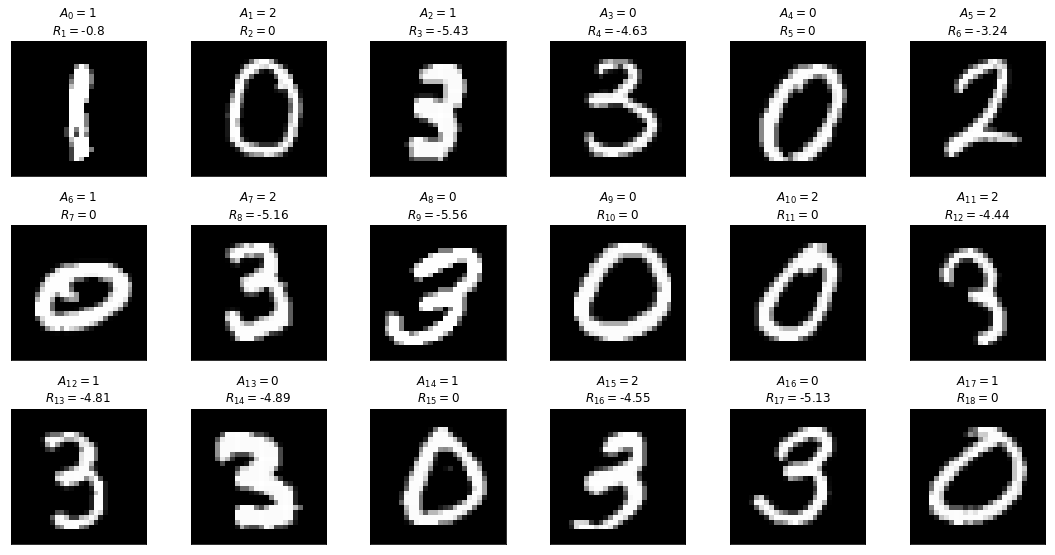

In [10]:
k = 0
fig = plt.figure(figsize=(15,8))
for t in range(18):
    k += 1
    plt.subplot(3,6,k)
    plt.tight_layout()
    plt.imshow(images[t], cmap='gray', interpolation='none')
    plt.title("$A_{" + str(t) + "}=$"+str(actions[t])+"\n$R_{" + str(t+1) + "}=$"+str(round(rewards[t],2)))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [8]:
images = images.reshape(-1, 784)
images = images.astype('float32')
images /= 255

In [9]:
images.shape

(50000, 784)

In [10]:
type(images)

numpy.ndarray

In [11]:
len(actions)

50000

In [12]:
len(rewards)

50000

In [13]:
np.array(actions)[:, None].shape

(50000, 1)

In [14]:
actions_dummy = pd.get_dummies(actions)
actions_dummy.shape

(50000, 3)

In [15]:
type(np.array(actions_dummy))

numpy.ndarray

In [16]:
actions_dummy

,0,1,2
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
49995,0,1,0
49996,1,0,0
49997,0,0,1
49998,0,0,1


In [17]:
X = np.concatenate((images,np.array(actions_dummy)),axis=1)
X.shape

(50000, 787)

In [19]:
X0 = X.copy()
X1 = X.copy()
X2 = X.copy()
X0[:,784:787] = 0
X0[:,784] = 1
X1[:,784:787] = 0
X1[:,785] = 1
X2[:,784:787] = 0
X2[:,786] = 1

## Q-learning with Approximation via NN 

In [187]:
T = len(rewards)
chunk_size = 1280
n_chunks = int(T/chunk_size)
n_chunks

39

In [206]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(787,)))                          
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))
          
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               403456    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 513       
Total params: 666,625
Trainable params: 666,625
Non-trainable params: 0
_________________________________________________________________


In [115]:
T = len(rewards)
gamma = 0.9
chunk_size = 1280
n_chunks = int(T/chunk_size)
n_chunks

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(787,)))                          
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))
          
model.summary()

model.compile(loss='mse', metrics=['mse'], optimizer='adam')

for k in range(n_chunks):
    times = np.arange(chunk_size*k,chunk_size*(k+1))
    print("\nCurrent time t = ", str(times[0]))
    
    q_hat0 = model.predict(X0[times+1])
    q_hat1 = model.predict(X1[times+1])
    q_hat2 = model.predict(X2[times+1])
    q_hatOpt = np.min(np.concatenate((q_hat0,q_hat1,q_hat2),axis=1),axis=1)
    target = -np.array(rewards)[times] + gamma*q_hatOpt
    
    history = model.fit(X[times], target, batch_size=128, epochs=10, verbose=1)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               403456    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 513       
Total params: 666,625
Trainable params: 666,625
Non-trainable params: 0
_________________________________________________________________

Current time t =  0
Epoch 1/10
1280/1280 [==============================] - 1s 399us/step - loss: 4.9661 - mse: 

1280/1280 [==============================] - 0s 166us/step - loss: 0.6927 - mse: 0.6927

Current time t =  19200
Epoch 1/10
1280/1280 [==============================] - 0s 201us/step - loss: 1.3696 - mse: 1.3696
Epoch 2/10
1280/1280 [==============================] - 0s 197us/step - loss: 1.0871 - mse: 1.0871
Epoch 3/10
1280/1280 [==============================] - 0s 197us/step - loss: 0.9641 - mse: 0.9641
Epoch 4/10
1280/1280 [==============================] - 0s 191us/step - loss: 0.8990 - mse: 0.8990
Epoch 5/10
1280/1280 [==============================] - 0s 186us/step - loss: 0.7888 - mse: 0.7888
Epoch 6/10
1280/1280 [==============================] - 0s 186us/step - loss: 0.7925 - mse: 0.7925
Epoch 7/10
1280/1280 [==============================] - 0s 195us/step - loss: 0.6758 - mse: 0.6758
Epoch 8/10
1280/1280 [==============================] - 0s 199us/step - loss: 0.6210 - mse: 0.6210
Epoch 9/10
1280/1280 [==============================] - 0s 195us/step - loss: 0.6625 - mse: 0.6

1280/1280 [==============================] - 0s 150us/step - loss: 0.4903 - mse: 0.4903

Current time t =  39680
Epoch 1/10
1280/1280 [==============================] - 0s 137us/step - loss: 1.2549 - mse: 1.2549
Epoch 2/10
1280/1280 [==============================] - 0s 154us/step - loss: 1.0474 - mse: 1.0474
Epoch 3/10
1280/1280 [==============================] - 0s 163us/step - loss: 0.9256 - mse: 0.9256
Epoch 4/10
1280/1280 [==============================] - 0s 161us/step - loss: 0.7774 - mse: 0.7774
Epoch 5/10
1280/1280 [==============================] - 0s 159us/step - loss: 0.7168 - mse: 0.7168
Epoch 6/10
1280/1280 [==============================] - 0s 157us/step - loss: 0.7217 - mse: 0.7217
Epoch 7/10
1280/1280 [==============================] - 0s 156us/step - loss: 0.5924 - mse: 0.5924
Epoch 8/10
1280/1280 [==============================] - 0s 172us/step - loss: 0.5725 - mse: 0.5725
Epoch 9/10
1280/1280 [==============================] - 0s 153us/step - loss: 0.5686 - mse: 0.5

In [122]:
T = len(rewards)
gamma = 0.9
chunk_size = 1280
n_chunks = int(T/chunk_size)
n_chunks

model = models.Sequential()
#model.add(layers.Dense(512, input_shape=(787,)))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dense(512, activation='relu', input_shape=(787,)))                          
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(512))
#model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))
          
model.summary()

model.compile(loss='mse', metrics=['mse'], optimizer='adam')

for k in range(n_chunks):
    times = np.arange(0,chunk_size*(k+1))
    print("\nCurrent time t = ", str(times[0]))
    
    q_hat0 = model.predict(X0[times+1])
    q_hat1 = model.predict(X1[times+1])
    q_hat2 = model.predict(X2[times+1])
    q_hatOpt = np.min(np.concatenate((q_hat0,q_hat1,q_hat2),axis=1),axis=1)
    target = -np.array(rewards)[times] + gamma*q_hatOpt
    
    history = model.fit(X[times], target, batch_size=128, epochs=1, verbose=1)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               403456    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 513       
Total params: 666,625
Trainable params: 666,625
Non-trainable params: 0
_________________________________________________________________

Current time t =  0
Epoch 1/1
1280/1280 [==============================] - 1s 423us/step - loss: 4.8909 - mse: 4

In [285]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(787,)))                          
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
          
model.summary()

model.compile(loss='mse', metrics=['mse'], optimizer='adam')

for k in range(n_chunks):
    times = np.arange(chunk_size*k,chunk_size*(k+1))
    print("\nCurrent time t = ", str(times[0]))
    
    q_hat0 = model.predict(X0[times+1])
    q_hat1 = model.predict(X1[times+1])
    q_hat2 = model.predict(X2[times+1])
    q_hatOpt = np.min(np.concatenate((q_hat0,q_hat1,q_hat2),axis=1),axis=1)
    target = -np.array(rewards)[times] + gamma*q_hatOpt
    
    history = model.fit(X[times], target, batch_size=128, epochs=2, verbose=1)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               403456    
_________________________________________________________________
dropout_43 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_45 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 1)               

Epoch 1/2
1280/1280 [==============================] - 0s 262us/step - loss: 0.8563 - mse: 0.8563
Epoch 2/2
1280/1280 [==============================] - 0s 315us/step - loss: 0.6330 - mse: 0.6330

Current time t =  40960
Epoch 1/2
1280/1280 [==============================] - 0s 282us/step - loss: 0.8174 - mse: 0.8174
Epoch 2/2
1280/1280 [==============================] - 0s 285us/step - loss: 0.6541 - mse: 0.6541

Current time t =  42240
Epoch 1/2
1280/1280 [==============================] - 0s 309us/step - loss: 0.8190 - mse: 0.8190
Epoch 2/2
1280/1280 [==============================] - 0s 276us/step - loss: 0.7281 - mse: 0.7281

Current time t =  43520
Epoch 1/2
1280/1280 [==============================] - 0s 275us/step - loss: 0.7523 - mse: 0.7523
Epoch 2/2
1280/1280 [==============================] - 0s 306us/step - loss: 0.6015 - mse: 0.6015

Current time t =  44800
Epoch 1/2
1280/1280 [==============================] - 0s 277us/step - loss: 0.6754 - mse: 0.6754
Epoch 2/2
1280/128

In [82]:
model.predict(X)

array([[9.420464 ],
       [9.400965 ],
       [9.379885 ],
       ...,
       [9.376858 ],
       [9.389588 ],
       [9.4003725]], dtype=float32)

In [123]:
q_hat0 = model.predict(X0)
q_hat1 = model.predict(X1)
q_hat2 = model.predict(X2)

In [124]:
AOpt = np.argmin(np.concatenate((q_hat0,q_hat1,q_hat2),axis=1),axis=1)
AOpt.shape

(50000,)

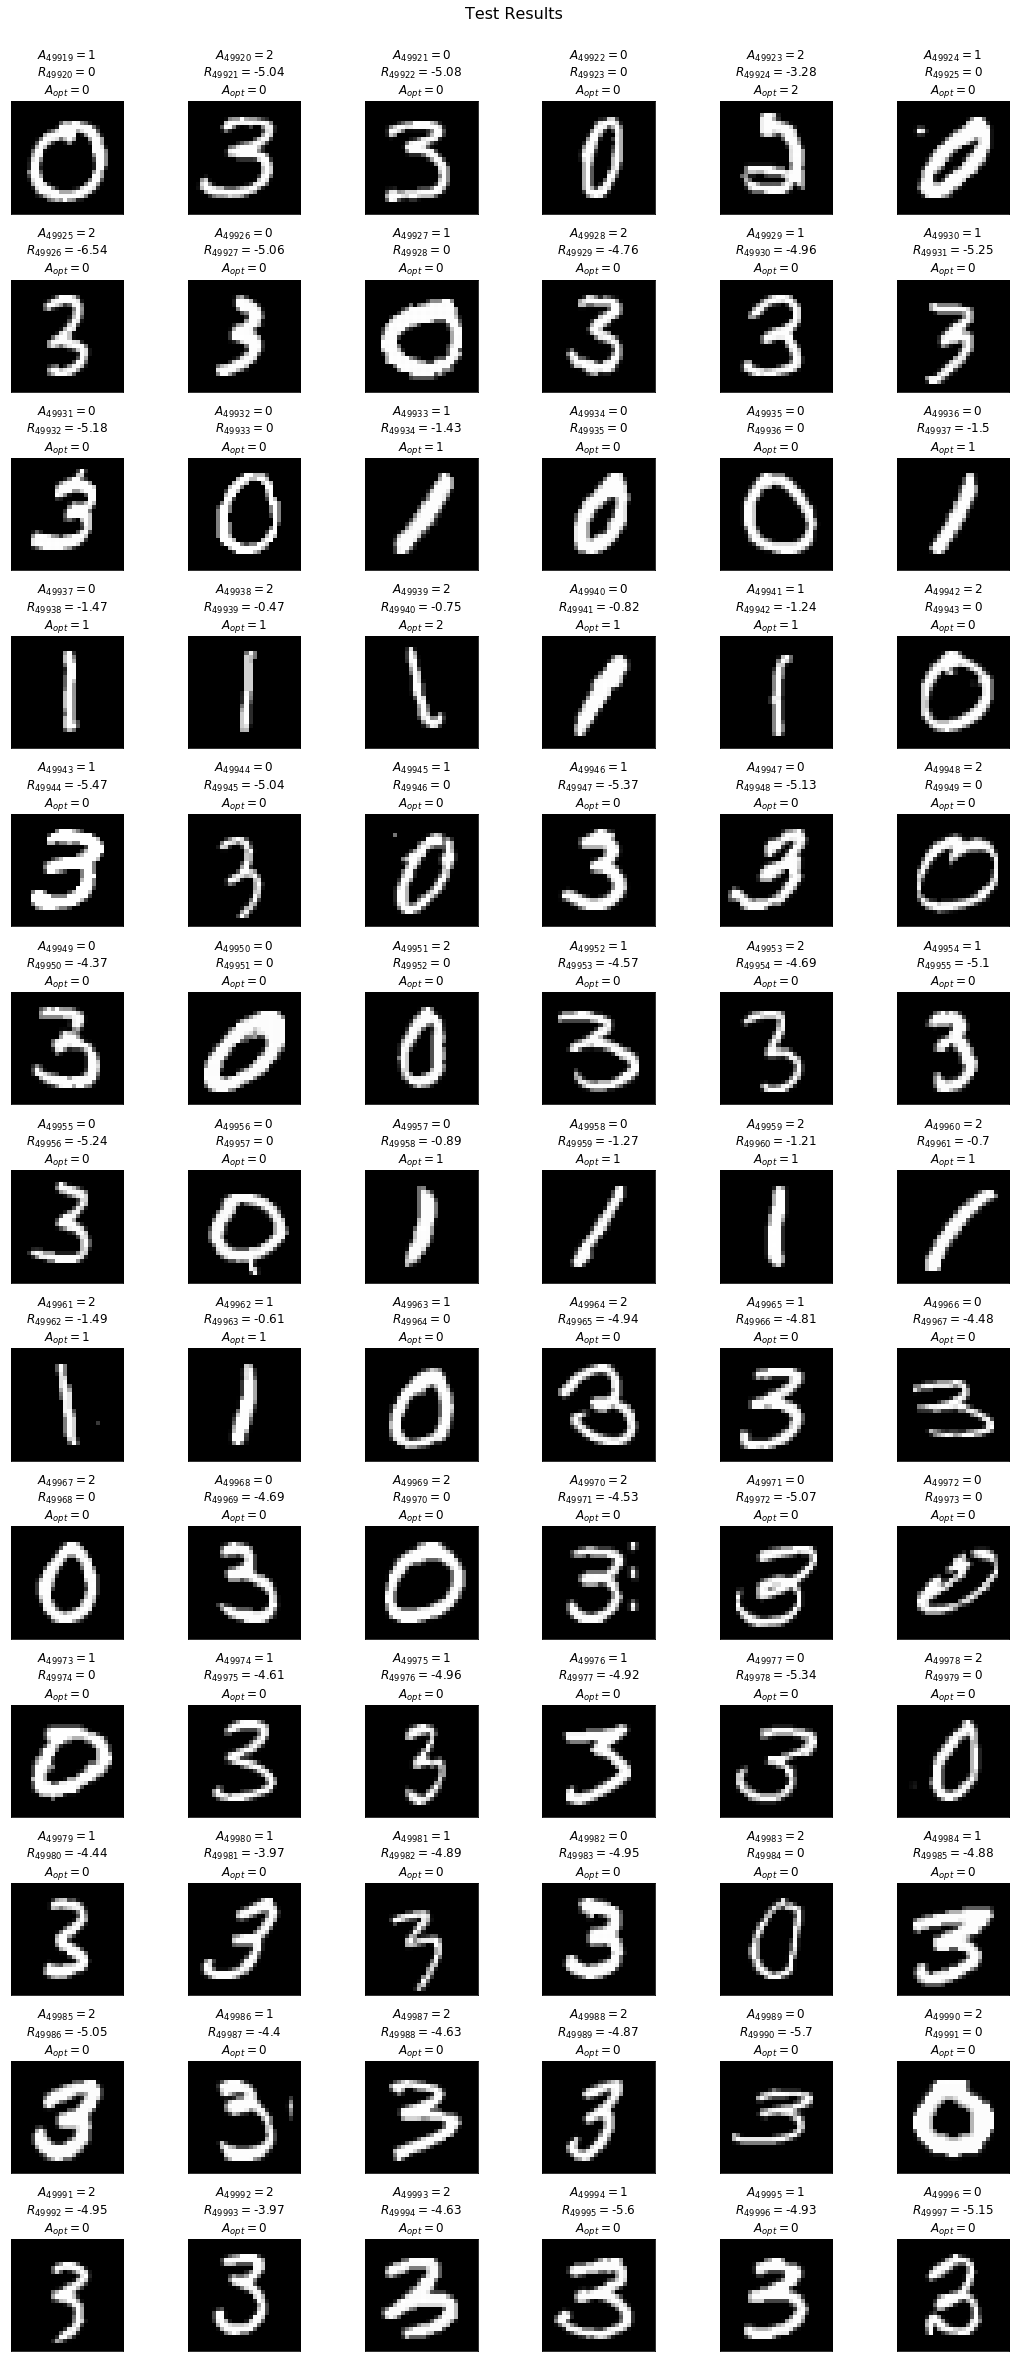

In [128]:
k = 0
fig = plt.figure(figsize=(15,2.5*13))
fig.suptitle('Test Results',y=1.014,size=16)
for t in range(49919,49919+6*13):
    k += 1
    plt.subplot(13,6,k)
    plt.tight_layout()
    plt.imshow(images[t], cmap='gray', interpolation='none')
    plt.title("$A_{"+str(t)+"}=$"+str(actions[t])+"\n$R_{"+str(t+1)+"}=$"+str(round(rewards[t],2))+"\n$A_{opt}=$"+str(AOpt[t]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()